# customFunctions.py testing

In this notebook we test the functions implemented in that file.

In first place, we import the file.

In [1]:
import sys
sys.path.append('../')

from src import customFunc as cf

### Test of `expand_observable()` function:

We need an observable to expand, lets take: $\hat{O}=\hat{Z_0}\otimes\hat{Z_1}$. We create it as an `SparsePauliOp` class instance:

In [2]:
from qiskit.quantum_info import SparsePauliOp

base_observable  = SparsePauliOp.from_list([("ZZ",1)])
print(base_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


Now, we expand it in order to work with n qubits: $\hat{O}=\hat{Z}_0\hat{Z}_1 ··· \hat{I}_{n-1} \hat{I}_n$

In [3]:
total_qubits = range(2, 11)

for n_q in total_qubits:
    expanded_observable = cf.expand_observable(base_observable, n_q)
    print(expanded_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZI'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIIII'],
              coeffs=[1.+0.j])


### Test of `evaluate_observable()` function:

we use the previous functions to make the needed observable and ansatz:

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


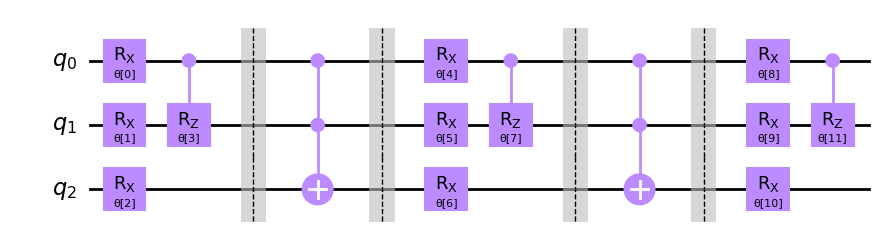

In [19]:
observable  = SparsePauliOp.from_list([("ZZ",1)])
print(observable)

from src import ansatzs as anz

ansatz_circuit, num_params = anz.build_Nlocal_ansatz(3)
display(ansatz_circuit.decompose().draw("mpl"))

Now we test the function, we have to give some values to the parameters and an `Estimator()` instance:

In [9]:
import numpy as np
from qiskit.primitives import Estimator

params = np.random.random(num_params)
estimator = Estimator()

exp_value = cf.evaluate_observable(params, ansatz_circuit, observable, estimator)

print(exp_value)

0.21740987252103688


### Test of `evaluate_deriv()` function:

Similar to the previuos fucntions, but we include an index to tell the program in which parameter it should derive:

In [10]:
deriv = cf.evaluate_deriv(params, ansatz_circuit, observable, 0, estimator)

print(deriv)

-0.5030126676181255


### Test of `evaluate_grad()` function:

Evaluates the derivative for each parameter:

In [11]:
grad = cf.evaluate_grad(params, ansatz_circuit, observable, estimator)

print(grad)

[-0.5030126676181255, 0.04424599114481173, -0.5796497500944959, 0.5695340468241213]


### Test of `get_variances_data` function:

In [12]:
vars = cf.get_variances_data(num_params, ansatz_circuit, observable, 0, 1000)

print(vars)

(0.18752791733128313, 0.09322497732872682)


### Test of `VQE_minimization_BP` function:


Preparando ejecución para 3 qubits.
Se usarán 12 parámetros


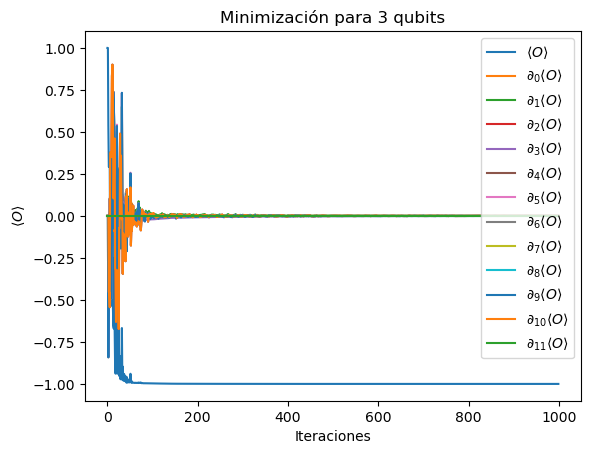

Fin ejecución con 3 qubits. Mínimo encontrado: -0.9999988124885485

Preparando ejecución para 4 qubits.
Se usarán 18 parámetros


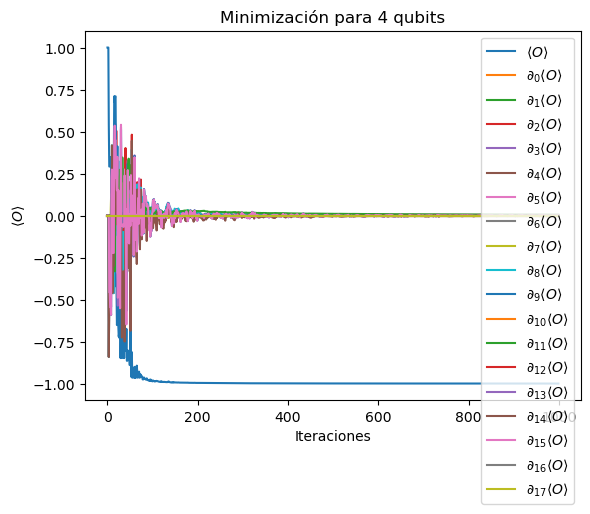

Fin ejecución con 4 qubits. Mínimo encontrado: -0.9997449869377185
{'n_qubits': [3, 4], 'minimum_values': [-0.9999988124885485, -0.9997449869377185]}


In [18]:
data = cf.VQE_minimization_BP(anz.build_Nlocal_ansatz, 3, 4, base_observable, "all")

print(data)

### Test `variance_vs_nQubits` function:


Calculando varianzas con 3 qubits.

Varianza del valor esperado: 0.13089411664441047
Varianza de la derivada: 0.07537146926121534

Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.10337463590835175
Varianza de la derivada: 0.023673194558121606

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.11786525382839878
Varianza de la derivada: 0.019498520302833597

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.08639968371851117
Varianza de la derivada: 0.006554145747067542

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.07833468375532676
Varianza de la derivada: 0.0037107802662039004

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.060092700067952046
Varianza de la derivada: 0.0017169124739986033

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.08578527421347465
Varianza de la derivada: 0.0005534201635333676

Pendiente para valor esperado: -0.09861136438443059.
R^2 para valor espe

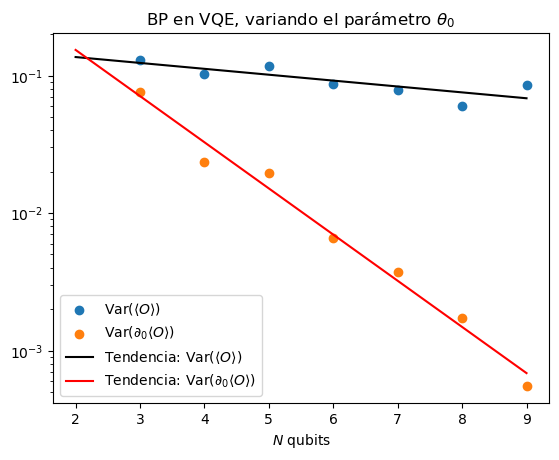

{'n_qubits': [3, 4, 5, 6, 7, 8, 9], 'var_value': [0.13089411664441047, 0.10337463590835175, 0.11786525382839878, 0.08639968371851117, 0.07833468375532676, 0.060092700067952046, 0.08578527421347465], 'var_deriv': [0.07537146926121534, 0.023673194558121606, 0.019498520302833597, 0.006554145747067542, 0.0037107802662039004, 0.0017169124739986033, 0.0005534201635333676], 'value_slope': -0.09861136438443059, 'value_ord': -1.7946584317380612, 'value_rsquare': 0.6554908528140857, 'deriv_slope': -0.7731759900374846, 'deriv_ord': -0.32622211677763335, 'deriv_rsquare': 0.9844296876092682}


In [20]:
data = cf.variance_vs_nQubits(anz.build_Nlocal_ansatz, 3, 9, base_observable, 0, do_regress=True)

print(data)